In [28]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
iphone_reviews=[]

In [18]:
### Extracting reviews from Amazon website ################
for i in range(1,10):
    ip=[]  
    url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_next_2?pageNumber="+str(i)
    response = requests.get(url)
#    print(response)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
    for i in range(len(reviews)):
        ip.append(reviews[i].text)  
    iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

# writng reviews in a text file 
with open("iphone.txt","w",encoding='utf8') as output:
    for i in iphone_reviews:
        output.write(i+"\n")

In [19]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)

In [20]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


In [21]:

# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [22]:

with open("E:\Top Mentor\stop.txt","r") as sw:
    stopwords = sw.read()
stopwords = stopwords.split("\n")

In [23]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

['this', 'awsome', 'Data', 'Science']

In [24]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [25]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

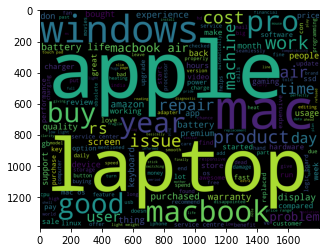

In [26]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)